# The Efficient Frontier.

Computing the Efficient Frontier when we have a set of expected returns, volatilities (variances) and correlations (covariances) by looking at the Ken French dataset of 30 different industry porfolios.

In [1]:
import pandas as pd
ind = pd.read_csv("/Users/account/Downloads/Portfolio_contruction/data/ind30_m_vw_rets.csv", header = 0, index_col=0) / 100
ind.index = pd.to_datetime(ind.index, format = '%Y%m').to_period('M')

In [2]:
ind.columns = ind.columns.str.strip()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import edhec_risk_kit_107 as erk
ind = erk.get_ind_returns()
ind.shape

(1110, 30)

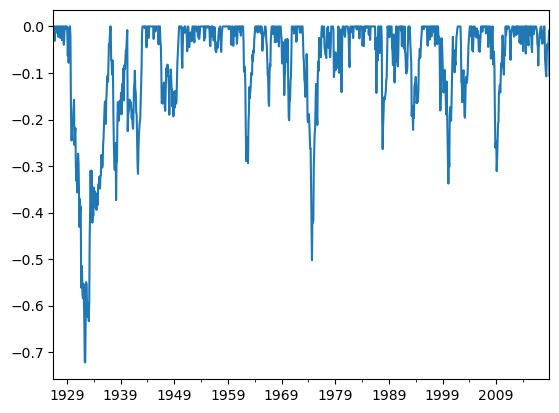

In [4]:
erk.drawdown(ind["Food"])["Drawdown"].plot()
plt.show()

In [5]:
erk.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified=True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

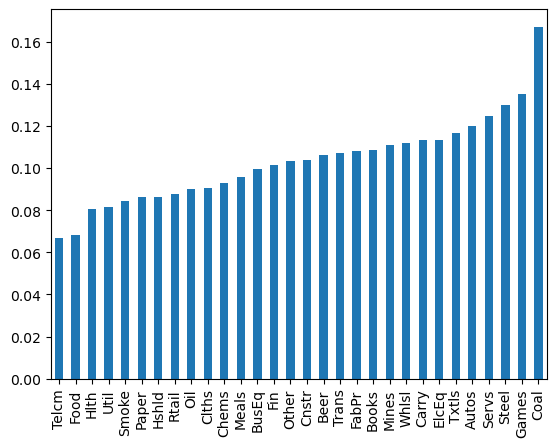

In [6]:
erk.var_gaussian(ind).sort_values().plot.bar()
plt.show()

In [7]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values()

Coal     0.084275
Steel    0.126052
Whlsl    0.143494
Other    0.160862
Mines    0.177109
Books    0.192686
Games    0.194420
Txtls    0.194906
Trans    0.214624
Autos    0.227548
Cnstr    0.229351
FabPr    0.265297
Servs    0.267263
Fin      0.282243
Carry    0.285916
ElcEq    0.293063
Clths    0.293105
Util     0.306945
Hshld    0.307349
Oil      0.330358
Meals    0.332717
BusEq    0.342974
Chems    0.344903
Beer     0.351780
Rtail    0.364325
Paper    0.364722
Telcm    0.383294
Hlth     0.437783
Smoke    0.446361
Food     0.454770
dtype: float64

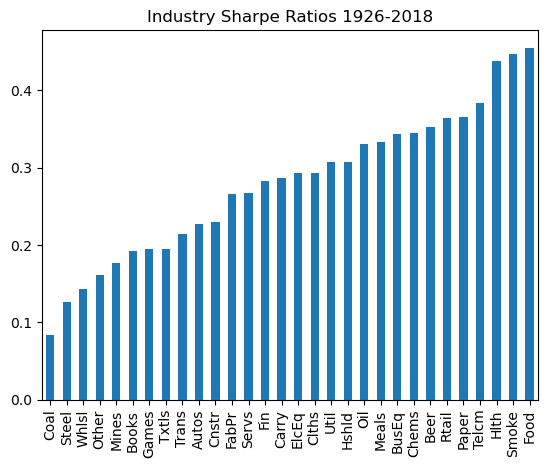

In [8]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018")
plt.show()

## Expected Returns and the Covariance Matrix

Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in future lectures. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimate of expected returns using the `annualize_rets()` function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000:

In [ ]:
er = erk.annualize_rets(ind["1996":"2000"], 12)

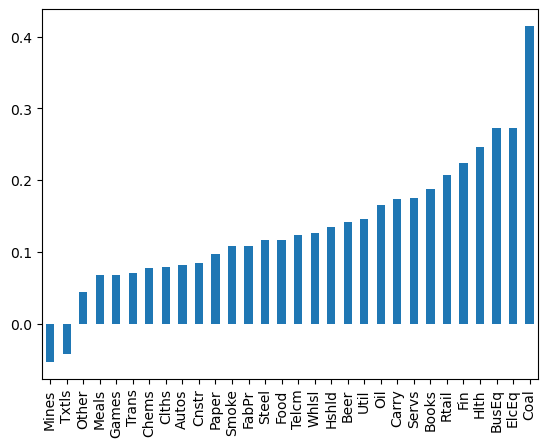

In [11]:
er.sort_values().plot.bar()
plt.show()

In [12]:
cov = ind["1996":"2000"].cov()
cov.shape

(30, 30)

In [13]:
l = ['Food','Beer','Smoke','Coal']
r = er[l]

In [14]:
covmat = cov.loc[l,l]

In [15]:
import numpy as np
w = np.repeat(1/4,4)
w

array([0.25, 0.25, 0.25, 0.25])

In [16]:
erk.portfolio_return(w,r)

0.19511097196038385

In [17]:
erk.portfolio_vol(w,covmat)

0.05505919577643704

## TWO Asset Frontier.

In [18]:
l = ['Games','Fin'] #Example

In [19]:
n_points = 20

weights = [np.array([w, 1-w]) for w in np.linspace(0,1,n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

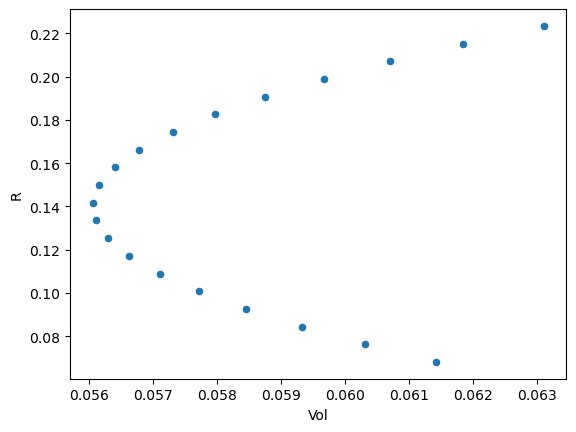

In [21]:
rets = [erk.portfolio_return(w,er[l]) for w in weights]
vols = [erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({'R': rets, 'Vol': vols})

plt.show(ef.plot.scatter(x ='Vol', y = 'R'))

## N-Asset Efficient Frontier.

In [ ]:
l = ['Games','Fin']

In [ ]:
w15 = erk.minimize_vol(0.15, er[l],cov.loc[l,l])
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [ ]:
w15

array([0.47287631, 0.52712369])

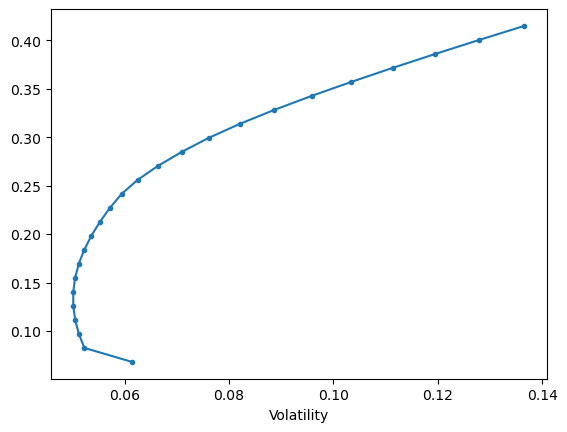

In [ ]:
l = ['Coal','Games','Fin', 'Smoke'] #Example
plt.show(erk.plot_ef(25,er[l],cov.loc[l,l]))

## Finding the Max Sharpe Ratio Portfolio.

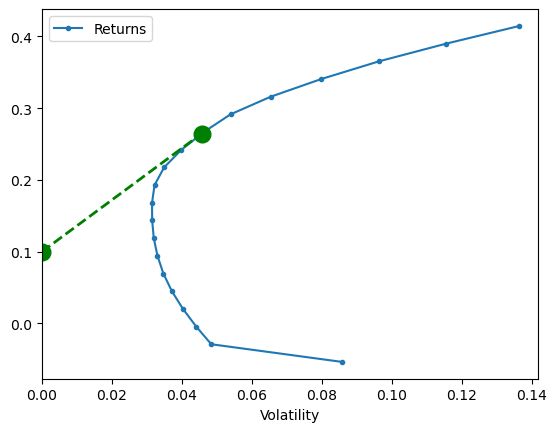

In [ ]:
erk.plot_ef(20, er, cov,show_cml= True, rf = 0.1)
plt.show()

# Lack of Robustness of the Markowitz Procedure, and the GMW.

In [ ]:
l = ['Food','Steel']
erk.msr(0.1,er[l],cov.loc[l,l])

array([0.75040364, 0.24959636])

In [ ]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

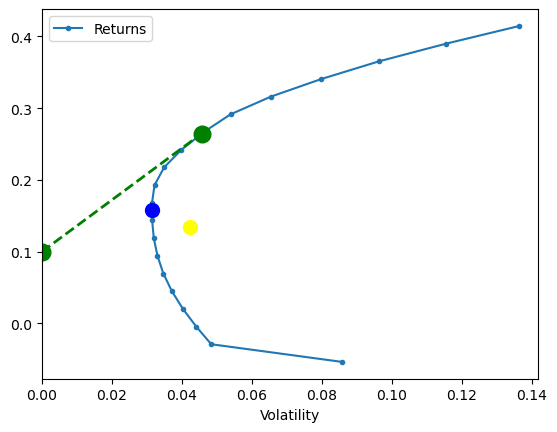

In [ ]:
erk.plot_ef(20, er, cov,show_cml= True, rf = 0.1,show_ew = True,show_gmv= True)
plt.show()